# Fake News Detection Project ->

Data Set Link -> https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection
(Kaggle.com)

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
true=pd.read_csv('true.csv')

In [124]:
fake=pd.read_csv('fake.csv')

In [4]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [125]:
true['label']=1       #True DataSet
fake['label']=0       #Fake DataSet

In [7]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# Concatinate/merge both the table row wise

In [126]:
news = pd.concat([fake, true],axis=0)  # Now the true and the fake statements will come todether for easier recognition of fake and true news

In [9]:
news.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [127]:
rows, columns = news.shape

print("Total number of rows:", rows)
print("Total number of columns:", columns)


Total number of rows: 44898
Total number of columns: 5


In [10]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

# Feature Selection

In [11]:
news=news.drop(['title','subject','date'],axis=1)  # Deleting the 'title', 'subject' and date column because we don't need this

In [121]:
rows, columns = news.shape

print("Total number of rows:", rows)
print("Total number of columns:", columns)

Total number of rows: 44898
Total number of columns: 3


In [12]:
news.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [13]:
news=news.sample(frac=1)                       #Reshuffling the data

In [14]:
news.head()

,text,label
15323,BRUSSELS (Reuters) - Major issues must still...,1
3416,There are several movements out there to try a...,0
11145,(Reuters) - Atlantic City Mayor Don Guardian o...,1
15460,SEOUL (Reuters) - President Donald Trump will ...,1
9532,LONDON (Reuters) - Donald Trump said he was un...,1


In [15]:
news.reset_index(inplace=True)
news.head()

,index,text,label
0,15323,BRUSSELS (Reuters) - Major issues must still...,1
1,3416,There are several movements out there to try a...,0
2,11145,(Reuters) - Atlantic City Mayor Don Guardian o...,1
3,15460,SEOUL (Reuters) - President Donald Trump will ...,1
4,9532,LONDON (Reuters) - Donald Trump said he was un...,1


In [16]:
news.drop(['index'],axis=1, inplace=True)  #Removing the index col

In [17]:
news.head()

,text,label
0,BRUSSELS (Reuters) - Major issues must still...,1
1,There are several movements out there to try a...,0
2,(Reuters) - Atlantic City Mayor Don Guardian o...,1
3,SEOUL (Reuters) - President Donald Trump will ...,1
4,LONDON (Reuters) - Donald Trump said he was un...,1


# Data Cleaning 
Making data more readable and clear to the machine 

In [20]:
import re                         #Regular Expression Module

In [21]:
def wordopt(text):
    #Convert into lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+','',text)

    # Remove HTML tags
    text=re.sub(r'<.*?>', '',text)

    #Remove punctuation
    text=re.sub(r'[^\w\s]', '', text)

    #Remove digits
    text=re.sub(r'\d', '',text)

    #Remove newline characters
    text=re.sub(r'\n', ' ', text)

    return text

In [22]:
news['text'] = news['text'].apply(wordopt)

In [23]:
news['text']    #all the words are in running letters with no numbers , digits and other unusefull things

0        brussels reuters   major issues  must still be...
1        there are several movements out there to try a...
2        reuters  atlantic city mayor don guardian on t...
3        seoul reuters  president donald trump will wra...
4        london reuters  donald trump said he was unlik...
                               ...                        
44893    here we go again another student art contest t...
44894    several mosques in california have received th...
44895                                                     
44896    whiskey tango foxtrotthe united states  sent i...
44897    washington reuters  a us service member from t...
Name: text, Length: 44898, dtype: object

In [24]:
x = news['text']        #Dependent variable
y = news['label']       #Independent vaiable

In [25]:
x

0        brussels reuters   major issues  must still be...
1        there are several movements out there to try a...
2        reuters  atlantic city mayor don guardian on t...
3        seoul reuters  president donald trump will wra...
4        london reuters  donald trump said he was unlik...
                               ...                        
44893    here we go again another student art contest t...
44894    several mosques in california have received th...
44895                                                     
44896    whiskey tango foxtrotthe united states  sent i...
44897    washington reuters  a us service member from t...
Name: text, Length: 44898, dtype: object

In [26]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    1
Name: label, Length: 44898, dtype: int64

# Exploratory Data Analysis (EDA)
EDA stands for Exploratory Data Analysis. It's an approach to analyzing data sets to summarize their main characteristics, often with visual methods. The goal of EDA is to gain insights into the data that will guide further investigation or inform decisions.

# Let’s explore the unique values in the each category using below code.

In [ ]:
import seaborn as sns

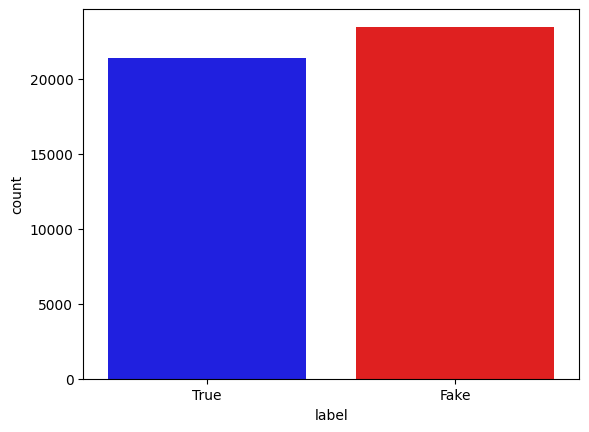

In [119]:
# Map labels to corresponding categories
news['label'] = news['label'].map({0: 'Fake', 1: 'True'})

# Create the count plot
sns.countplot(data=news, x='label', hue='label', palette={'Fake': 'red', 'True': 'blue'})
plt.show()

# We have assigned the label 1 to true news and the label 0 to fake news,
# the count plot will display the number of instances (or news articles) labeled as true (1) and fake (0).

# Let’s plot the bargraph of the top 20 most frequent words.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

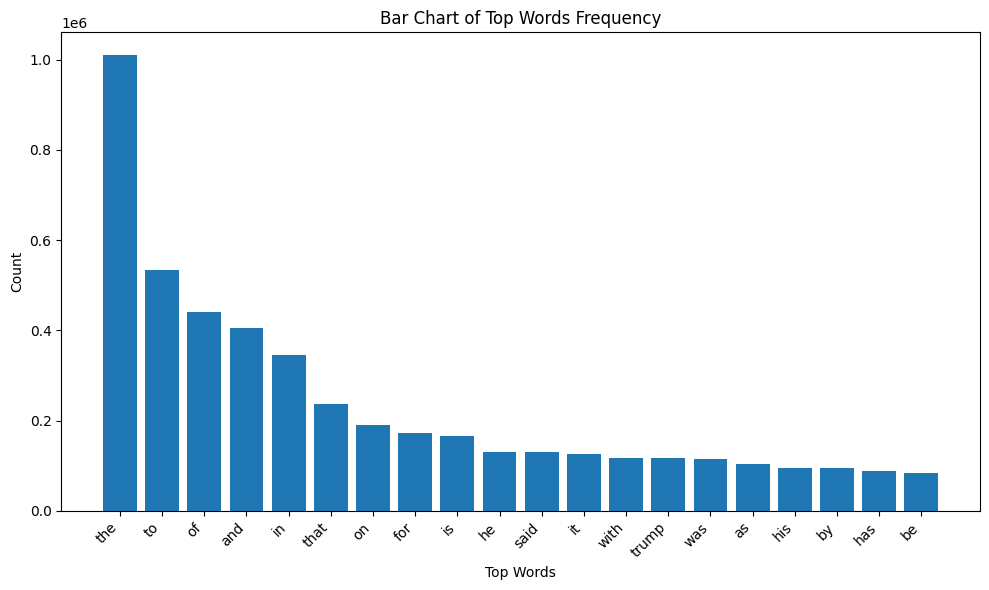

In [28]:
# Function to get top words
def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus) 
    bag_of_words = vec.transform(corpus) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True) 
    return words_freq[:n] 

# Get top 20 words
common_words = get_top_n_words(news['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df1['Word'], df1['Count'])
plt.xlabel('Top Words')
plt.ylabel('Count')
plt.title('Bar Chart of Top Words Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# # Set y-axis ticks to display integers
# plt.yticks(np.arange(0, df1['Count'].max() + 1, 1))
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

# Diving data into test data and training data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)            # diving data into training and test as 70:30 ratio  (30 is for test data)                                                         

In [31]:
x_train.shape

(31428,)

In [32]:
x_test.shape

(13470,)

# Feature Extraction 
Converting the text data into vector or numerical data to , so that it will be used by the machine more accurately

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
vectorization = TfidfVectorizer()

In [35]:
xv_train = vectorization.fit_transform(x_train)

In [36]:
xv_test = vectorization.transform(x_test)

In [37]:
xv_train

<31428x174696 sparse matrix of type '<class 'numpy.float64'>'
	with 6444981 stored elements in Compressed Sparse Row format>

In [38]:
xv_test

<13470x174696 sparse matrix of type '<class 'numpy.float64'>'
	with 2734910 stored elements in Compressed Sparse Row format>

# MACHINE LEARNING

# Algorithm Used - Logistic Regression
Logistic regression is a statistical method used for binary classification tasks, where the goal is to predict the probability that an instance belongs to one of two classes. It's widely used in various fields such as machine learning, statistics, and social sciences. Despite its name, logistic regression is a classification algorithm rather than a regression algorithm.

In [43]:
from sklearn.linear_model import LogisticRegression # Importing LogisticRegression using sklearn linear_model

In [44]:
LR = LogisticRegression()   #Creating instance of LR

# Training the model with data

In [45]:
LR.fit(xv_train, y_train)  #training the model 

LogisticRegression()

In [46]:
pred_lr = LR.predict(xv_test)

In [47]:
LR.score(xv_test, y_test)

0.9896807720861173

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6975
           1       0.99      0.99      0.99      6495

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



 # Confusion Matrix for Logistic Regression:
 A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It allows visualization of the performance of an algorithm and provides a summary of the predictive accuracy of a classification model.

In [77]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, pred_lr)

# Print the confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_lr)


Confusion Matrix for Logistic Regression:
[[6892   83]
 [  56 6439]]


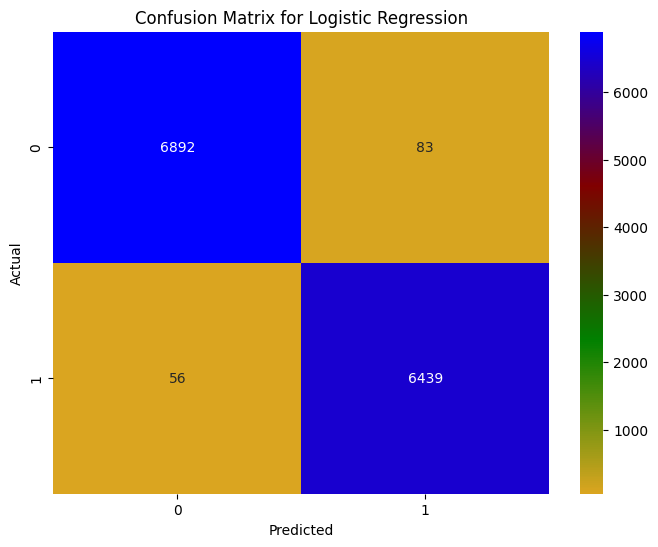

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define custom colors
colors = [(0.855, 0.647, 0.125),  # Golden
          (0.0, 0.502, 0.0),      # Green
          (0.502, 0.0, 0.0),      # Maroon
          (0.0, 0.0, 1.0)]        # Blue

# Define custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)

# Plotting the confusion matrix heatmap with custom colors
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap=custom_cmap)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Using Decision Tree Classifier
Decision tree classification is a popular machine learning algorithm used for both classification and regression tasks. Here, I'll focus on its application in classification.

A decision tree is a flowchart-like tree structure where an internal node represents a feature (or attribute), the branch represents a decision rule, and each leaf node represents the outcome (class label). The decision tree algorithm builds the tree recursively by selecting the best feature to split the data at each node.

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DTC = DecisionTreeClassifier()

In [52]:
DTC.fit(xv_train, y_train)

DecisionTreeClassifier()

In [53]:
pred_dtc = DTC.predict(xv_test)

In [54]:
DTC.score(xv_test, y_test)

0.9958426132145508

In [55]:
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6975
           1       1.00      1.00      1.00      6495

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Confusion Matrix for Decision Tree Classifier:
[[6945   30]
 [  26 6469]]


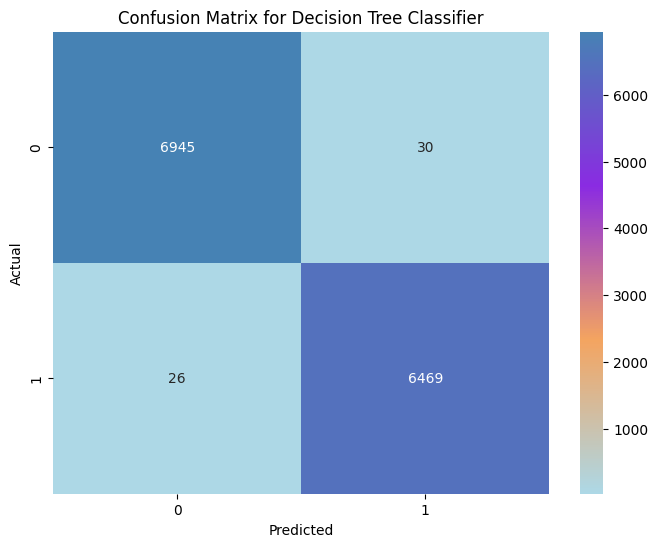

In [83]:
from matplotlib.colors import LinearSegmentedColormap

# Generate confusion matrix
conf_matrix_dtc = confusion_matrix(y_test, pred_dtc)

# Print the confusion matrix
print("Confusion Matrix for Decision Tree Classifier:")
print(conf_matrix_dtc)

# Plotting the confusion matrix heatmap with custom colors
plt.figure(figsize=(8, 6))

# Define custom colors
colors = [(0.678, 0.847, 0.902),  # Light blue
          (0.957, 0.643, 0.376),  # Light brown
          (0.541, 0.169, 0.886),  # Purple
          (0.275, 0.51, 0.706)]   # Medium blue

# Define custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)

# Plot the heatmap
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap=custom_cmap)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Using RandomForestClassifier
Random Forest is an ensemble learning method widely used for classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputs the mode (classification) or mean prediction (regression) of the individual trees. Random Forests are known for their robustness and high accuracy, making them popular in various applications.

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier()

In [58]:
rfc.fit(xv_train, y_train)

RandomForestClassifier()

In [59]:
predict_rfc = rfc.predict(xv_test)

In [60]:
rfc.score(xv_test, y_test)

0.9891610987379361

In [61]:
print(classification_report(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6975
           1       0.99      0.99      0.99      6495

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Confusion Matrix for Random Forest Classifier:
[[6890   85]
 [  61 6434]]


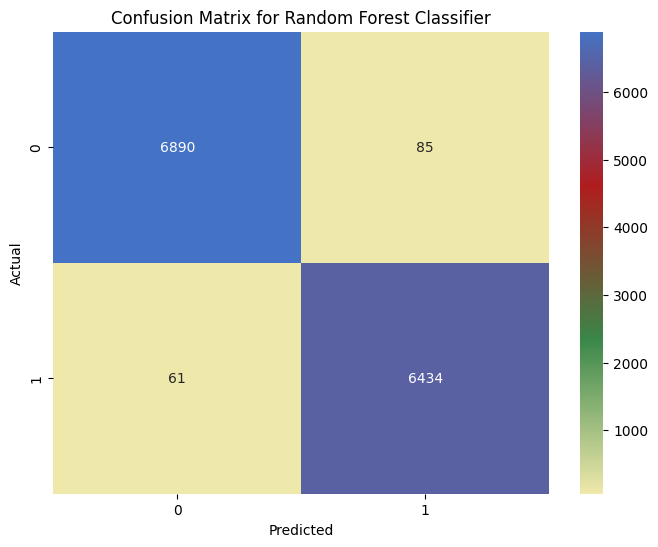

In [85]:
# Generate confusion matrix
conf_matrix_rfc = confusion_matrix(y_test, predict_rfc)

# Print the confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(conf_matrix_rfc)

# Plotting the confusion matrix heatmap with custom colors
plt.figure(figsize=(8, 6))

# Define custom colors
colors = [(0.933, 0.91, 0.667),   # Light yellow
          (0.227, 0.529, 0.286),  # Dark green
          (0.69, 0.114, 0.114),   # Dark red
          (0.267, 0.447, 0.769)]  # Medium blue

# Define custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)

# Plot the heatmap
sns.heatmap(conf_matrix_rfc, annot=True, fmt='d', cmap=custom_cmap)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Gradient Boosting Classifier 
Gradient Boosting Classifier is a popular machine learning algorithm used for classification tasks. It belongs to the ensemble learning methods family, specifically the boosting algorithms. Gradient Boosting builds a strong predictive model by combining the predictions of several weak learners, typically decision trees.

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbc = GradientBoostingClassifier()

In [64]:
gbc.fit(xv_train, y_train)

GradientBoostingClassifier()

In [65]:
pred_gbc = gbc.predict(xv_test)

In [66]:
gbc.score(xv_test, y_test)

0.9957683741648107

In [67]:
print(classification_report(y_test,pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6975
           1       0.99      1.00      1.00      6495

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Confusion Matrix for Gradient Boosting Classifier:
[[6936   39]
 [  18 6477]]


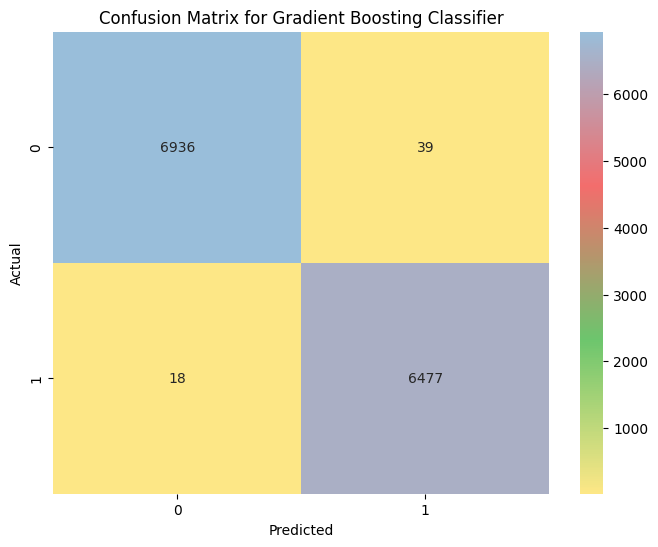

In [87]:
# Generate confusion matrix
conf_matrix_gbc = confusion_matrix(y_test, pred_gbc)

# Print the confusion matrix
print("Confusion Matrix for Gradient Boosting Classifier:")
print(conf_matrix_gbc)

# Plotting the confusion matrix heatmap with custom colors
plt.figure(figsize=(8, 6))

# Define custom colors
colors = [(0.992, 0.906, 0.525),   # Light yellow
          (0.424, 0.773, 0.427),  # Light green
          (0.953, 0.427, 0.424),   # Light red
          (0.6, 0.745, 0.855)]  # Light blue

# Define custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors)

# Plot the heatmap
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap=custom_cmap)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 # Predictive Model

In [68]:
def output_label(n):
    if n==0:
        return"It is a Fake News"
    elif n==1:
        return "It is a Genuine News"

In [114]:
def manual_testing(news):
    testing_news = {"text": [news]} # Corrected syntax for defining dictionary
    new_def_test = pd.DataFrame (testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test) # Assuming 'vectorization' is your vectorizer object
    pred_lr = LR.predict(new_xv_test)
    pred_DTC = DTC.predict(new_xv_test)
    pred_gbc = gbc.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)
    return "LogisticRegression Prediction: {} \nGradientBoostingClassifier Prediction: {} \nRandomForestClassifier Prediction: {} \nDecisionTreeClassifier Prediction: {}".format(
        output_label(pred_lr[0]), output_label(pred_gbc[0]), output_label(pred_rfc[0]), output_label(pred_DTC[0]))

In [ ]:
news_article = str(input())

In [ ]:
manual_testing(news_article)